In [7]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
nltk.download("stopwords")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

df = pd.read_excel("nama_file.xlsx")
#################################################################################
df.head()

def clean_text(text = "default"):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # # Stem the words
    # words = [stemmer.stem(word) for word in words]
    # Join the words back into a single string
    return " ".join(words)

def clean_text_key(text = "default"):
    # Convert to lowercase
    text = text.lower()
    text = text.replace(' ', '')
    exceptions = ["-"]
    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    # Re-add exceptions
    for exception in exceptions:
        text = text.replace(' ' + exception + ' ', exception)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # # Stem the words
    # words = [stemmer.stem(word) for word in words]
    # Join the words back into a single string
    return " ".join(words)

# df.head()
df = df[["Publication Year", "Series", "Title", "Abstract Note", "Manual Tags", "Author"]]
# remove blank rows
df.dropna(subset=['Publication Year'], inplace=True)
df.dropna(subset=['Title'], inplace=True)
df.dropna(subset=['Series'], inplace=True)
df.dropna(subset=['Abstract Note'], inplace=True)
df.dropna(subset=['Manual Tags'], inplace=True)
df.dropna(subset=['Author'], inplace=True)

# Clean and normalize the text data
# df["Manual Tags"] = df["Manual Tags"].astype(str).apply(clean_text_key)
df["Series"] = df["Series"].astype(str).apply(clean_text)
# df["Author"] = df["Author"].astype(str).apply(clean_text)
# df["Abstract Note"] = df["Abstract Note"].astype(str).apply(clean_text)
# df["Title"] = df["Title"].astype(str).apply(clean_text)
# df.head()

# set the type
df = df.astype({"Publication Year":'int', "Author":'string', "Series":'string', "Title":'string', "Abstract Note":'string', "Manual Tags":'string'})
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Publication Year,Series,Title,Abstract Note,Manual Tags,Author
0,2023,mindtrek 23,"""\textbackslash""Call me Kiran\textbackslash"" –...",Natural language processing has taken enormous...,artificial intelligence; chatbots; ChatGPT; di...,"Rajala, Jaakko; Hukkanen, Jenni; Hartikainen, ..."
11,2023,assets 23,A Diary Study in Social Virtual Reality: Impac...,People with disabilities (PWD) have shown a gr...,avatar; diary study; disability disclosure; ha...,"Zhang, Kexin; Deldari, Elmira; Yao, Yaxing; Zh..."
14,2023,sigir 23,A Geometric Framework for Query Performance Pr...,"Thanks to recent advances in IR and NLP, the w...",conversational search; dense representation; qpp,"Faggioli, Guglielmo; Ferro, Nicola; Muntean, C..."
19,2023,sigir 23,A Personalized Dense Retrieval Framework for U...,Developing a universal model that can efficien...,dense retrieval; personalization; unified info...,"Zeng, Hansi; Kallumadi, Surya; Alibadi, Zaid; ..."
27,2023,acm se 23,A Survey on Conversational Search and Applicat...,This paper aims to provide a radical rundown o...,biomedical convsearch; conversational search; ...,"Adatrao, Naga Sai Krishna; Gadireddy, Gowtham ..."


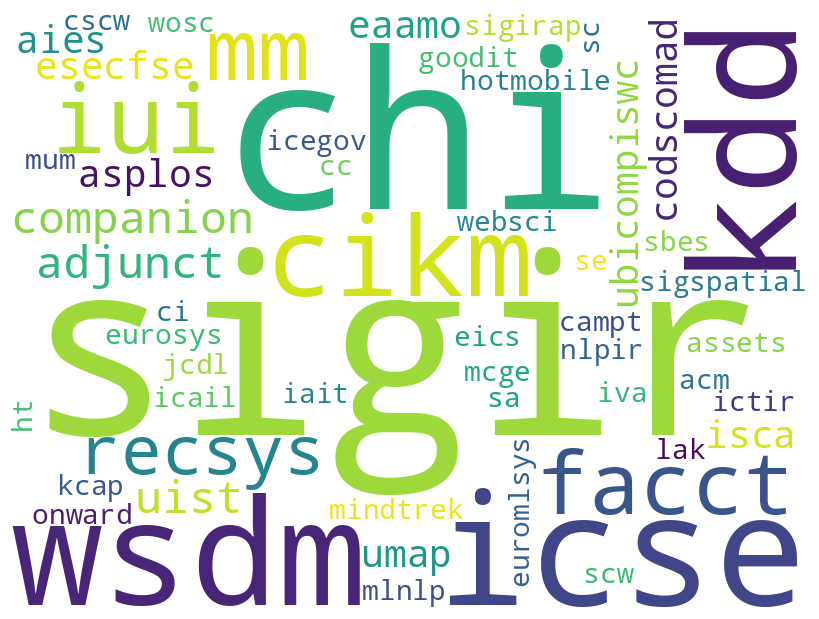

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ';'.join(list(df["Series"].values))
# # Menghapus spasi
# long_string = long_string.replace(' ', '')

# # Menghapus tanda koma
# long_string = long_string.replace(',', '')

# # Mengganti titik koma dengan spasi
long_string = long_string.replace(';', ' ')
# Membuat word cloud
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='white',
                max_words=1000000,
                stopwords = None,
                min_font_size = 10).generate(long_string)

# Menampilkan word cloud
plt.figure(figsize = (8, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [22]:
def hitung_frekuensi_kata(kalimat):
    # Memisahkan kalimat menjadi kata-kata
    kata_kalimat = kalimat.split()

    # Kamus untuk menyimpan frekuensi setiap kata
    frekuensi_kata = {}

    # Iterasi melalui setiap kata dalam kalimat
    for kata in kata_kalimat:
        # Menghitung frekuensi kata dan menyimpannya dalam kamus
        if kata in frekuensi_kata:
            frekuensi_kata[kata] += 1
        else:
            frekuensi_kata[kata] = 1

    # Mengurutkan kamus berdasarkan nilai frekuensi terbanyak
    frekuensi_kata = dict(sorted(frekuensi_kata.items(), key=lambda item: item[1], reverse=True))

    return frekuensi_kata

# Contoh penggunaan
frekuensi_kata = hitung_frekuensi_kata(long_string)

# Menampilkan hasil
i = 0
for kata, frekuensi in frekuensi_kata.items():
    print(f"Kata '{kata}' muncul sebanyak {frekuensi} kali.")
    i += 1
    if (i == 24):
      break


Kata '23' muncul sebanyak 85 kali.
Kata '24' muncul sebanyak 22 kali.
Kata 'sigir' muncul sebanyak 13 kali.
Kata 'chi' muncul sebanyak 10 kali.
Kata 'icse' muncul sebanyak 7 kali.
Kata 'wsdm' muncul sebanyak 7 kali.
Kata 'kdd' muncul sebanyak 7 kali.
Kata 'cikm' muncul sebanyak 7 kali.
Kata '22' muncul sebanyak 7 kali.
Kata 'iui' muncul sebanyak 5 kali.
Kata 'mm' muncul sebanyak 4 kali.
Kata 'facct' muncul sebanyak 4 kali.
Kata 'recsys' muncul sebanyak 4 kali.
Kata '21' muncul sebanyak 4 kali.
Kata 'companion' muncul sebanyak 3 kali.
Kata 'adjunct' muncul sebanyak 3 kali.
Kata 'uist' muncul sebanyak 3 kali.
Kata 'umap' muncul sebanyak 2 kali.
Kata 'ubicompiswc' muncul sebanyak 2 kali.
Kata 'esecfse' muncul sebanyak 2 kali.
Kata 'asplos' muncul sebanyak 2 kali.
Kata 'codscomad' muncul sebanyak 2 kali.
Kata 'aies' muncul sebanyak 2 kali.
Kata 'eaamo' muncul sebanyak 2 kali.
